In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
with open('esem4fit.txt') as fin, open('fit.txt', 'w') as fout:
    for line in fin:
        fout.write(line.replace('\t', ','))

In [3]:
read_file = pd.read_csv (r'fit.txt')
read_file.to_csv (r'fit.csv', index=None)

df = pd.read_csv(r'fit.csv',names=["x","y"])
df.head()
print(df)

       x         y
0  -1.00  0.151250
1  -0.92  0.083828
2  -0.84  0.062890
3  -0.76  0.026487
4  -0.68  0.021388
5  -0.60  0.012808
6  -0.52  0.018010
7  -0.44  0.060025
8  -0.36  0.078500
9  -0.28  0.106431
10 -0.20  0.099390
11 -0.12  0.115650
12 -0.04  0.133770
13  0.04  0.101914
14  0.12  0.097012
15  0.20  0.105238
16  0.28  0.095889
17  0.36  0.051636
18  0.44  0.048207
19  0.52  0.018802
20  0.60  0.020749
21  0.68  0.027548
22  0.76  0.031700
23  0.84  0.069883
24  0.92  0.112413
25  1.00  0.172327


In [4]:
x = df['x'].to_numpy()
y = df['y'].to_numpy()
print(x,y)

[-1.   -0.92 -0.84 -0.76 -0.68 -0.6  -0.52 -0.44 -0.36 -0.28 -0.2  -0.12
 -0.04  0.04  0.12  0.2   0.28  0.36  0.44  0.52  0.6   0.68  0.76  0.84
  0.92  1.  ] [0.15125  0.083828 0.06289  0.026487 0.021388 0.012808 0.01801  0.060025
 0.0785   0.106431 0.09939  0.11565  0.13377  0.101914 0.097012 0.105238
 0.095889 0.051636 0.048207 0.018802 0.020749 0.027548 0.0317   0.069883
 0.112413 0.172327]


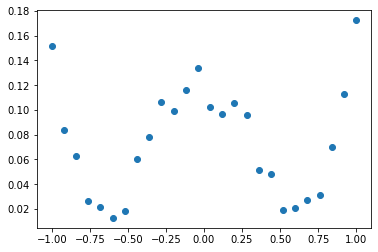

In [5]:
import pandas as pd
data = pd.read_csv('esem4fit.txt',sep='\s+',header=None)
data = pd.DataFrame(data)

import matplotlib.pyplot as plt
x = data[0]
y = data[1]
plt.scatter(x, y)
plt.show()

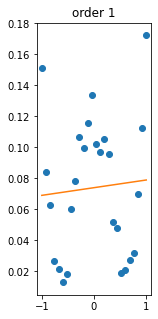

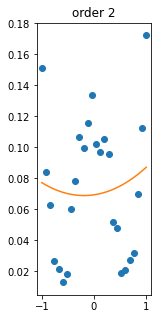

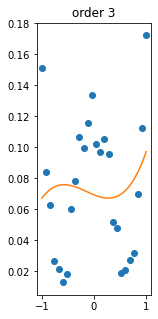

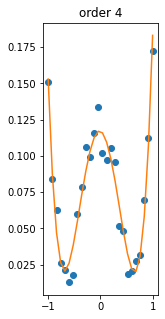

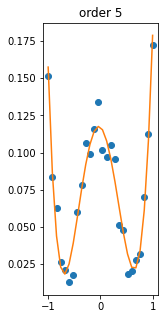

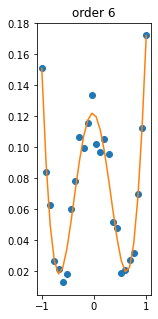

In [6]:
for i in range(1,7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x, y, i)
    plt.figure(figsize=(7,11))
    plt.subplot(2,3,i)
    plt.plot(x, y, 'o')
    # evaluate the values for a polynomial
    plt.plot(x, np.polyval(y_est, x))
    plt.title(f'order {i}')


In [5]:
def legendre(x,n):
    P = np.array([1,x,(3*x**2 -1)/2,(5*x**3 - 3*x)/2,(35*x**4 - 30*x**2 +3)/8,(63*x**5 - 70*x**3 + 15*x)/8,(231*x**6 - 315*x**4 + 105*x**2 -5)/16])
    P_req = np.zeros(n)
    for i in range(n):
        P_req[i] = P[i]
    return P_req

In [6]:

def Conjugate_Gradient(mat_A,mat_b,x_old,tol=1e-4):
    x_new = x_old.copy()
    r_new = mat_b - np.dot(mat_A,x_new)
    d_new = r_new
    r_new_norm = np.linalg.norm(r_new)
    
    num_iter = 0
    x = [x_new]
    while r_new_norm > tol:
        A_d_new = np.dot(mat_A,d_new)
        r_new_r_new = np.dot(r_new,r_new)
        
        alpha = r_new_r_new/np.dot(d_new,A_d_new)
        x_new = x_new + (alpha*d_new)
        r_new = r_new - (alpha*A_d_new)
        beta = np.dot(r_new, r_new) / r_new_r_new
        d_new = r_new + (beta * d_new)
        
        num_iter += 1
        #if(np.linalg.norm(r_new)>=r_new_norm):
        #    break
        x.append(x_new)
        r_new_norm = np.linalg.norm(r_new)
        #print("comp",r_new_norm)
        if(num_iter>=30000):
            break
    print('Iteration: {} \t x = {} \t residual = {:.4f}'.format(num_iter, x_new, r_new_norm))    
    #print('\nSolution: \t x = {}'.format(x_new))
        
    return np.array(x_new)



In [10]:
def legendre_fit(x,y,n):
    row = len(x)
    mat_A = np.zeros((row,n+1))

    for i in range(row):
        for j in range(n+1):
            mat_A[i][j]= legendre(x[i],n+1)[j]
    mat_At = mat_A.T
    mat_A1 = np.dot(mat_At,mat_A)
    mat_y1 = np.dot(mat_At,y)
    x_ini = np.ones(n+1)
    coeffs = Conjugate_Gradient(mat_A1,mat_y1,x_ini)     #coefficient matrix
    
    return coeffs

def legendre_y(x,coeffs):
    n = len(x)
    y = np.zeros(n)
    order = len(coeffs)
    for i in range(n):
        y[i] = np.sum(coeffs*legendre(x[i],order))
    #y = np.sum(coeffs*legendre(x,order))
    return y


def showfit_legendre(x,y,coeffs):
    #row = len(x)
    x_new = np.linspace(x[0],x[-1])

    y_new = legendre_y(x_new,coeffs)

    plt.plot(x, y, "o", x_new, y_new)

    plt.xlim([x[0]-1, x[-1] + 1 ])
    
    return None

In [8]:
# for order 4 Legenedre Polynomial

coeffs_legendre = legendre_fit(x,y,4)

# coeffs = [ 0.0696578   0.00362402 -0.01208258  0.01142622  0.11049235]

Iteration: 5 	 x = [ 0.0696578   0.00362402 -0.01208258  0.01142622  0.11049235] 	 residual = 0.0000


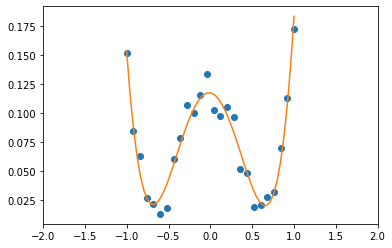

In [11]:
# for order 4 Legenedre Polynomial

showfit_legendre(x,y,coeffs_legendre)

In [15]:
# for order 6 Legenedre Polynomial

coeffs_legendre1 = legendre_fit(x,y,6)

# coeffs = [ 0.0696578   0.00362402 -0.01208258  0.01142622  0.11049235]

Iteration: 7 	 x = [ 0.07003197  0.00430169 -0.01016671  0.01308374  0.11411855 -0.00672697
 -0.01238456] 	 residual = 0.0000


In [16]:
# for order 6 Legenedre Polynomial

showfit_legendre(x,y,coeffs_legendre1)

KeyError: -1